# Try this Exercises

## Problem 1


Above we investigated the convergence of the sample mean and sample median to the population mean.  We found that the sample mean converges to the population mean faster than the sample median.  However, when outliers were added, we found that the sample median converged faster than the sample mean to the population mean.

For this problem, design an experiment to compare the convergence of the sample $\sigma$ to the population $\sigma$ with the convergence of the sample deviation to the population deviation for the normal distribution and the normal distribution with outliers.

Note: the ratio of the mean absolute deviation to the standard deviation is $\sqrt{2/\pi}=0.7978456$.

Discuss the result.  Does it surprise you? 

### $\textit{Answer:}$
We'll start by repeating the same procedure for comparing the converegence of a Gaussian distribution from earlier in the lecture. We'll assume a population $\sigma$ of 1.5 and a population mean of 5.0 just like in lecture.

In [2]:
'''
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Copied directly from lecture 

Execute twice to make sure it takes effect
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
'''
%pylab inline
import numpy as np
import scipy.stats

fontsize = 20
figsize = (10,6)

# Configure parameters
plt.rcParams.update({'font.size': fontsize, 'figure.figsize': figsize})

# Default tick label size
plt.rcParams['xtick.labelsize'] = fontsize
plt.rcParams['ytick.labelsize'] = fontsize
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.size'] = 8
plt.rcParams['ytick.major.size'] = 8
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.width'] = 2

plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True
plt.rcParams['axes.linewidth'] = 2

Populating the interactive namespace from numpy and matplotlib


/home/idies/miniconda3/envs/py37/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['figsize']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [7]:
# No outliers:
def calc_stats(pop_mean,pop_sigma,draws):
    # original
    sample_mean1=[]
    sample_sigma1=[]
    sample_median1=[] 
    
    # add array for varience
    sample_var1 = []
    
    for i in range(draws.shape[0]):
        data=np.random.normal(pop_mean,pop_sigma,size=long(draws[i]))
        sample_mean1.append(data.mean())
        sample_sigma1.append(math.sqrt(data.var()))
        sample_median1.append(np.median(data))
        # grab the varience this time around
        sample_var1.append(data.var())
   
    # only interested in the varience and sigma of the sample this time
    return np.array(sample_var1),np.array(sample_sigma1)


# let the number of draws range from 2 to 3000.  

draws=np.linspace(2,3000,2999)

pop_mean=5.0
pop_sigma=1.5
pop_var = pop_sigma**2

In [9]:

sample_var1, sample_sigma1 = calc_stats(pop_mean,pop_sigma,draws)

array([2.000e+00, 3.000e+00, 4.000e+00, ..., 2.998e+03, 2.999e+03,
       3.000e+03])

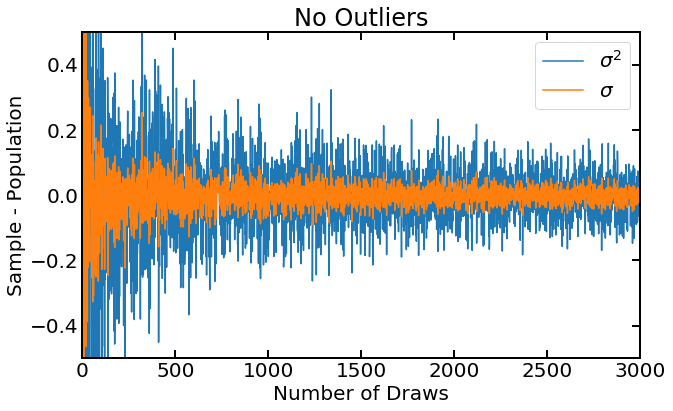

In [18]:
# Compute and plot
sample_var1, sample_sigma1 = calc_stats(pop_mean,pop_sigma,draws)
plt.ylim(-0.5,0.5)
plt.xlim(0,3000)

plt.plot(draws,sample_var1-pop_var, label = '$\sigma^2$')
plt.plot(draws,sample_sigma1-pop_sigma, label = '$\sigma$')

plt.title('No Outliers')
plt.xlabel('Number of Draws')
plt.ylabel('Sample - Population')
plt.legend()
plt.show()

Let's bin the data and find the average of the absolute values.

Text(0.5, 1.0, 'No Outliers')

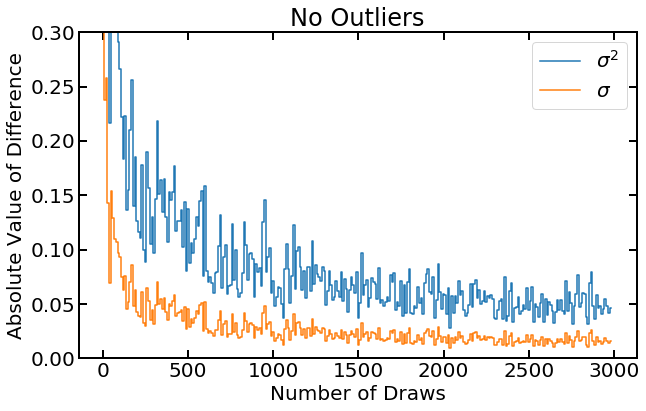

In [22]:
def get_abs_value_average(draws,y,bins):
    averaged=np.zeros(bins.shape[0]-1)
    for i in range(bins.shape[0]-1):
        mask=np.where((draws >= bins[i]) & (draws < bins[i+1]))
        averaged[i]=np.mean(y[mask])
    return averaged

bins=np.linspace(0,2990,300,endpoint=True)
bin_centers=0.5*(bins[0:-1]+bins[1:bins.shape[0]])

averaged_sigma1=get_abs_value_average(draws,abs(sample_sigma1-pop_sigma),bins)
averaged_var1=get_abs_value_average(draws,abs(sample_var1-pop_var),bins)

# Plot
plt.ylim(0,0.3)

plt.plot(bin_centers,averaged_var1,drawstyle='steps',label='$\sigma^2$')
plt.plot(bin_centers,averaged_sigma1,drawstyle='steps',label='$\sigma$')
plt.legend(loc='upper right')
plt.xlabel('Number of Draws')
plt.ylabel('Absolute Value of Difference')
plt.title('No Outliers')

Now we'll repeat this procedure for a distribution with outliers. Again, borrowing from lecture we have

In [37]:
def calc_stats_plus_outliers(pop_mean,pop_sigma,draws,fraction,outlier_size):
    # fraction will give the amount of draws assigned to the uniform
    #    with (1-fraction) assigned to random.
    # outlier_size gives the distance for the largest outlier
    sample_mean2=[]
    sample_sigma2=[]
    sample_median2=[]
    
    # add array for varience
    sample_var2 = []
    for i in range(draws.shape[0]):
        data1=np.random.normal(pop_mean,pop_sigma,size=long(((1-fraction)*draws[i])))
        data2=np.random.uniform(pop_mean-outlier_size*pop_sigma,pop_mean+outlier_size*pop_sigma,size=long(fraction*draws[i]))
        data=np.concatenate((data1,data2))
        sample_mean2.append(data.mean())
        sample_sigma2.append(math.sqrt(data.var()))
        sample_median2.append(np.median(data))
        sample_var2.append(data.var())
    return np.array(sample_var2),np.array(sample_sigma2)






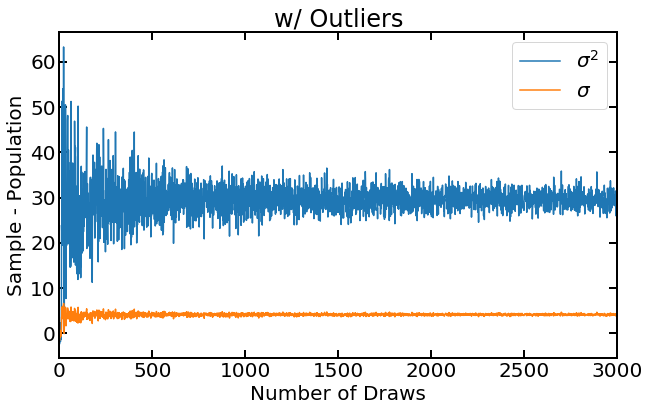

In [43]:
# Compute and plot 
fraction=0.1
outlier_size=20

sample_var_outliers, sample_sigma_outliers  =calc_stats_plus_outliers(pop_mean,pop_sigma,draws,fraction,outlier_size)



plt.xlim(0,3000)

plt.plot(draws,sample_var_outliers-pop_var, label = '$\sigma^2$')
plt.plot(draws,sample_sigma_outliers-pop_sigma, label = '$\sigma$')

plt.title('w/ Outliers')
plt.xlabel('Number of Draws')
plt.ylabel('Sample - Population')
#plt.ylim(-0.5,0.5)
plt.legend()
plt.show()



Bin data; find average of absolute values

Text(0.5, 1.0, 'w/ Outliers')

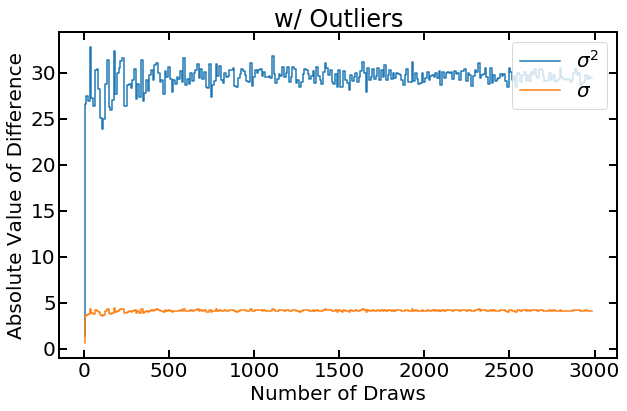

In [48]:
def get_abs_value_average(draws,y,bins):
    averaged=np.zeros(bins.shape[0]-1)
    for i in range(bins.shape[0]-1):
        mask=np.where((draws >= bins[i]) & (draws < bins[i+1]))
        averaged[i]=np.mean(y[mask])
    return averaged

bins=np.linspace(0,2990,300,endpoint=True)
bin_centers=0.5*(bins[0:-1]+bins[1:bins.shape[0]])

averaged_sigma2=get_abs_value_average(draws,abs(sample_sigma_outliers-pop_sigma),bins)
averaged_var2=get_abs_value_average(draws,abs(sample_var_outliers-pop_var),bins)

# Plot


plt.plot(bin_centers,averaged_var2,drawstyle='steps',label='$\sigma^2$')
plt.plot(bin_centers,averaged_sigma2,drawstyle='steps',label='$\sigma$')
plt.legend(loc='upper right')
plt.xlabel('Number of Draws')
plt.ylabel('Absolute Value of Difference')
plt.title('w/ Outliers')

It looks like the data set including outliars struggles to converge, particularly the varience. Both the varience and uncertainty converge reasonably quickly for the dataset without outliars (though the varience has a large amount of scatter).

This is about what I would expect given how the the convergence of the mean and median behaved differently under the influence of outliars.

## Problem 2
Imagine a quasar emitting isotropically through space.  You all are X-ray astronomers interested in studying the quasar.  Technology has progressed to the point that each of you can position yourself at the same radius from the quasar at random positions. Each of you has a detector one square centimeter in size.  

Imagine also that technology has progressed to the point that we are all in "mind meld" with the supreme being, who has informed us that the X-ray count rate from the quasar in question is 0.5 counts per second.  

What is the exposure time needed for 80 out of 100 estimates of the count rate to fall between 0.45 and 0.55 counts per second?  

#### $\textit{Answer}$:
Recall that we can use `numpy.random.poisson` to construct a poisson distribution with a characteristic lambda and number of draws. For a count rate of 0.5 counts per second and an exposure time of 10 seconds:

Text(0, 0.5, 'Probability')

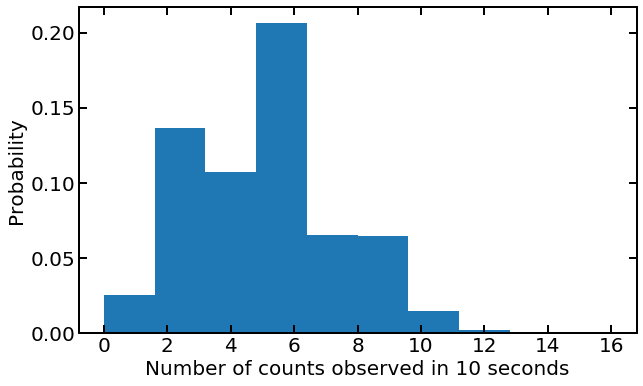

In [196]:
lam = 0.5
exp = 10
samp = 10000
test = np.random.poisson(lam*exp, samp) 

plt.hist(test,density = True)
plt.xlabel('Number of counts observed in ' + str(exp) + ' seconds')
plt.ylabel('Probability')




This graph shows us the possible number of counts in a given observation of 10 second assuming a count rate of 0.5 counts per second.

We can select where count rate falls within our target window of 0.45 to 0.55 counts/sec by dividing our counts by the exposure time. (Or, by multipling the critera by the exposure time so we can compare it to our count values)


In [206]:
here = np.where((test >= 0.45*exp) & (test <= 0.55*exp))[0]

# What fraction of our observations were within the range?
frac = len(here) / len(test)
frac

0.1806

So 18% of our counts for this observation fell within in the specified range for a single test. Now we'll iterate through various possible exposure times until this fraction approach 80%:

In [211]:
lam = 0.5
samp = 10000

for i in range(10,500, 5): # sample various exposure times at 5 second intervals

    test = np.random.poisson(lam*i, samp)
    here = np.where((test >= 0.45*i) & (test <= 0.55*i))[0] # select regions that match criteria
    frac = len(here) / len(test)
    
    if frac >= 0.80:
        print('Nessecary exposure time: ' + str(i) + ' seconds')
        print('Fraction: '+ str(frac))
        break
        

Nessecary exposure time: 315 seconds
Fraction: 0.8002


So it looks like that for a source with a count-rate of 0.5 counts per second, an exposure time on the order of  $\textbf{300 seconds}$ is required so that 80% of our estimates lie within a count-rate of 0.44 to 0.55 counts per second